# Analyzing Sickness Indicators and ESI in a Large Dataset

## 1. Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [4]:

from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import chi2_contingency
import xgboost as xgb 
import mord
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 2. Load the Dataset

In [6]:
df = pd.read_csv("C:/Users/DELL/OneDrive - Ministere de l'Enseignement Superieur et de la Recherche Scientifique/Desktop/Machine Learning/FinalMlfast.csv",nrows=5000)


In [7]:
list(df.columns)

['dep_name',
 'esi',
 'age',
 'gender',
 'ethnicity',
 'race',
 'lang',
 'religion',
 'maritalstatus',
 'employstatus',
 'insurance_status',
 'disposition',
 'arrivalmode',
 'arrivalmonth',
 'arrivalday',
 'arrivalhour_bin',
 'previousdispo',
 '2ndarymalig',
 'abdomhernia',
 'abdomnlpain',
 'abortcompl',
 'acqfootdef',
 'acrenlfail',
 'acutecvd',
 'acutemi',
 'acutphanm',
 'adjustmentdisorders',
 'adltrespfl',
 'alcoholrelateddisorders',
 'allergy',
 'amniosdx',
 'analrectal',
 'anemia',
 'aneurysm',
 'anxietydisorders',
 'appendicitis',
 'artembolism',
 'asppneumon',
 'asthma',
 'attentiondeficitconductdisruptivebeha',
 'backproblem',
 'biliarydx',
 'birthasphyx',
 'birthtrauma',
 'bladdercncr',
 'blindness',
 'bnignutneo',
 'bonectcncr',
 'bph',
 'brainnscan',
 'breastcancr',
 'breastdx',
 'brnchlngca',
 'bronchitis',
 'burns',
 'cardiaarrst',
 'cardiacanom',
 'carditis',
 'cataract',
 'cervixcancr',
 'chestpain',
 'chfnonhp',
 'chrkidneydisease',
 'coaghemrdx',
 'coloncancer',
 'com

# 3. Extract Relevant Columns

In [9]:
# Identify chief complaints (columns starting with 'cc_')
chief_complaint_cols = [col for col in df.columns if col.startswith('cc_')]

# Identify previous sickness columns (from 'abdomhernia' to 'whtblooddx')
all_columns = df.columns.tolist()
start_index = all_columns.index('abdomhernia')
end_index = all_columns.index('whtblooddx')
previous_sickness_cols = all_columns[start_index:end_index + 1]

# Combine relevant columns
relevant_cols = ['esi'] + chief_complaint_cols + previous_sickness_cols
df = df[relevant_cols]

In [10]:
df.describe()

,esi,cc_abdominalcramping,cc_abdominaldistention,cc_abdominalpain,cc_abdominalpainpregnant,cc_abnormallab,cc_abscess,cc_addictionproblem,cc_agitation,cc_alcoholintoxication,...,ulcerskin,umbilcord,unclassified,urinstone,urinyorgca,uteruscancr,uti,varicosevn,viralinfect,whtblooddx
count,49826.000000,49758.000000,49758.000000,49758.000000,49758.000000,49758.000000,49758.000000,49758.000000,49758.000000,49758.000000,...,50000.000000,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,3.001826,0.000904,0.001186,0.096989,0.002834,0.007697,0.006692,0.001065,0.001367,0.020640,...,0.010720,0.0,0.182920,0.049280,0.000280,0.005020,0.044500,0.006400,0.043120,0.005800
std,0.852220,0.030060,0.034994,0.296150,0.053158,0.087397,0.081534,0.032620,0.036943,0.142177,...,0.102982,0.0,0.386605,0.216454,0.016731,0.070675,0.206205,0.079744,0.203129,0.075937
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 4. Handle Missing Values 

In [12]:
df = df.dropna(subset=['esi'])
df[chief_complaint_cols + previous_sickness_cols] = df[chief_complaint_cols + previous_sickness_cols].fillna(0)
df['esi'] = df['esi'].astype('category')

In [13]:
print(df.isnull().sum().tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## **Display top correlations (absolute values)**


In [15]:
corr_matrix = df.corr()

top_correlations = corr_matrix.unstack().sort_values(key=abs, ascending=False)

top_correlations = top_correlations[top_correlations < 1.0]

print(top_correlations.head(10))

cc_sicklecellpain        sicklecell                 0.533824
sicklecell               cc_sicklecellpain          0.533824
mooddisorders            anxietydisorders           0.454158
anxietydisorders         mooddisorders              0.454158
coronathero              acutemi                    0.444024
acutemi                  coronathero                0.444024
hyperlipidem             htn                        0.428842
htn                      hyperlipidem               0.428842
alcoholrelateddisorders  cc_alcoholintoxication     0.408089
cc_alcoholintoxication   alcoholrelateddisorders    0.408089
dtype: float64


Number of PCA components retaining 90% variance: 168
Optimal height for cutting the dendrogram (with PCA): 7.33
Estimated number of clusters (with PCA): 3


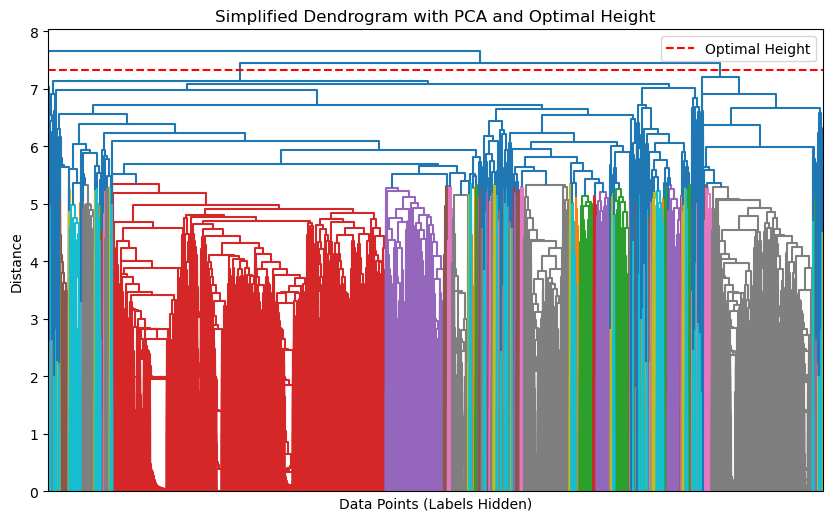

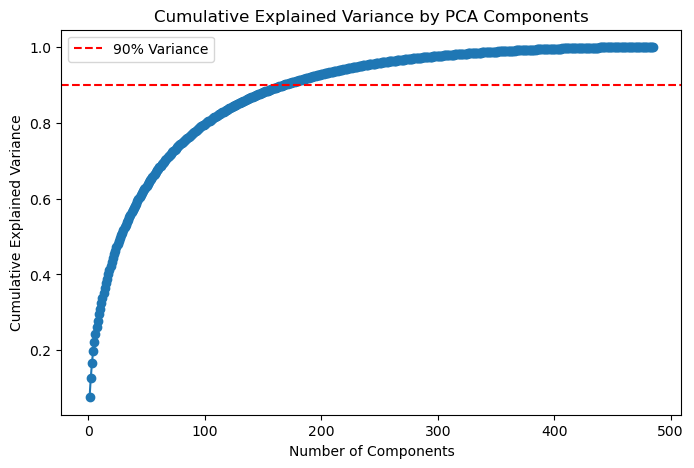

In [16]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df)

# Check for non-finite values and fill them
df_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)
df_encoded.fillna(df_encoded.mean(), inplace=True)

# Ensure all values are finite
if not np.all(np.isfinite(df_encoded)):
    raise ValueError("DataFrame contains non-finite values after cleaning.")

# Scale the data (important for PCA)
df_scaled =df_encoded

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

# Determine number of components to retain (e.g., 90% variance explained)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.9) + 1  # Retain 90% variance
print(f"Number of PCA components retaining 90% variance: {n_components}")

# Use the selected components
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_scaled)

# Calculate the linkage on PCA-transformed data
mergings = linkage(df_pca, method='complete')

# Analyze heights to find the best cut
heights = mergings[:, 2]
height_diffs = np.diff(heights)
optimal_height_idx = np.argmax(height_diffs)
optimal_height = (heights[optimal_height_idx] + heights[optimal_height_idx + 1]) / 2

# Estimate number of clusters
clusters = fcluster(mergings, t=optimal_height, criterion='distance')
num_clusters = len(np.unique(clusters))

print(f"Optimal height for cutting the dendrogram (with PCA): {optimal_height:.2f}")
print(f"Estimated number of clusters (with PCA): {num_clusters}")

# Simplified dendrogram
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(10, 6))
dendrogram(mergings, no_labels=True)
plt.axhline(y=optimal_height, color='r', linestyle='--', label='Optimal Height')
plt.title('Simplified Dendrogram with PCA and Optimal Height')
plt.xlabel('Data Points (Labels Hidden)')
plt.ylabel('Distance')
plt.legend()
plt.show()

# Optional: Plot explained variance to understand PCA
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.show()

In [17]:
list(df_encoded.columns)

['cc_abdominalcramping',
 'cc_abdominaldistention',
 'cc_abdominalpain',
 'cc_abdominalpainpregnant',
 'cc_abnormallab',
 'cc_abscess',
 'cc_addictionproblem',
 'cc_agitation',
 'cc_alcoholintoxication',
 'cc_alcoholproblem',
 'cc_allergicreaction',
 'cc_alteredmentalstatus',
 'cc_animalbite',
 'cc_ankleinjury',
 'cc_anklepain',
 'cc_anxiety',
 'cc_arminjury',
 'cc_armpain',
 'cc_armswelling',
 'cc_assaultvictim',
 'cc_asthma',
 'cc_backpain',
 'cc_bleeding/bruising',
 'cc_blurredvision',
 'cc_bodyfluidexposure',
 'cc_breastpain',
 'cc_breathingdifficulty',
 'cc_breathingproblem',
 'cc_burn',
 'cc_cardiacarrest',
 'cc_cellulitis',
 'cc_chestpain',
 'cc_chesttightness',
 'cc_chills',
 'cc_coldlikesymptoms',
 'cc_confusion',
 'cc_conjunctivitis',
 'cc_constipation',
 'cc_cough',
 'cc_cyst',
 'cc_decreasedbloodsugar-symptomatic',
 'cc_dehydration',
 'cc_dentalpain',
 'cc_depression',
 'cc_detoxevaluation',
 'cc_diarrhea',
 'cc_dizziness',
 'cc_drug/alcoholassessment',
 'cc_drugproblem',
 

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


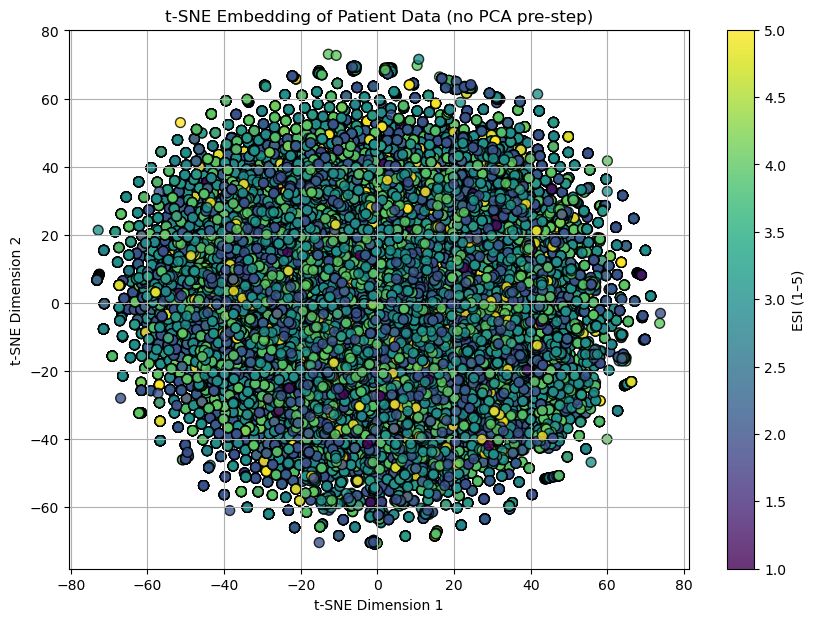

In [18]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd

# Assume df_encoded is your DataFrame of binary features + an 'esi' column
# Separate features and labels
X = df.drop(columns=['esi'])
y = df['esi']

# Initialize t-SNE (perplexity, learn rate, and random_state are tunable)
tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    n_iter=1000,
    random_state=42,
    init='random',
    metric='euclidean'
)

# Fit & transform
X_tsne = tsne.fit_transform(X)

# Build a DataFrame for easy plotting
tsne_df = pd.DataFrame(X_tsne, columns=['tsne1','tsne2'])
tsne_df['esi'] = y

# Plot
plt.figure(figsize=(10,7))
scatter = plt.scatter(
    tsne_df['tsne1'],
    tsne_df['tsne2'],
    c=tsne_df['esi'],
    cmap='viridis',
    alpha=0.8,
    s=50,
    edgecolors='k'
)
plt.colorbar(scatter, label='ESI (1–5)')
plt.title('t-SNE Embedding of Patient Data (no PCA pre-step)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()



In [19]:
X = df[chief_complaint_cols + previous_sickness_cols]
y = df['esi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features for better performance

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cramer's V Method OF analysis

In [23]:
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    if min_dim == 0:
        return 0  # No association when one variable has no variation
    return np.sqrt(chi2 / (n * min_dim))
associations = {}
for col in chief_complaint_cols + previous_sickness_cols:
    associations[col] = cramers_v(df[col], df['esi'])

associations_df = pd.DataFrame.from_dict(associations, orient='index', columns=['Cramers_V'])
associations_df = associations_df.sort_values(by='Cramers_V', ascending=False)

# Random Forest 

In [25]:


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

Classification Report:
               precision    recall  f1-score   support

         1.0       0.32      0.11      0.17        89
         2.0       0.64      0.59      0.61      2897
         3.0       0.62      0.68      0.65      4331
         4.0       0.61      0.63      0.62      2203
         5.0       0.44      0.21      0.28       446

    accuracy                           0.62      9966
   macro avg       0.53      0.44      0.47      9966
weighted avg       0.61      0.62      0.61      9966

Accuracy: 0.617098133654425


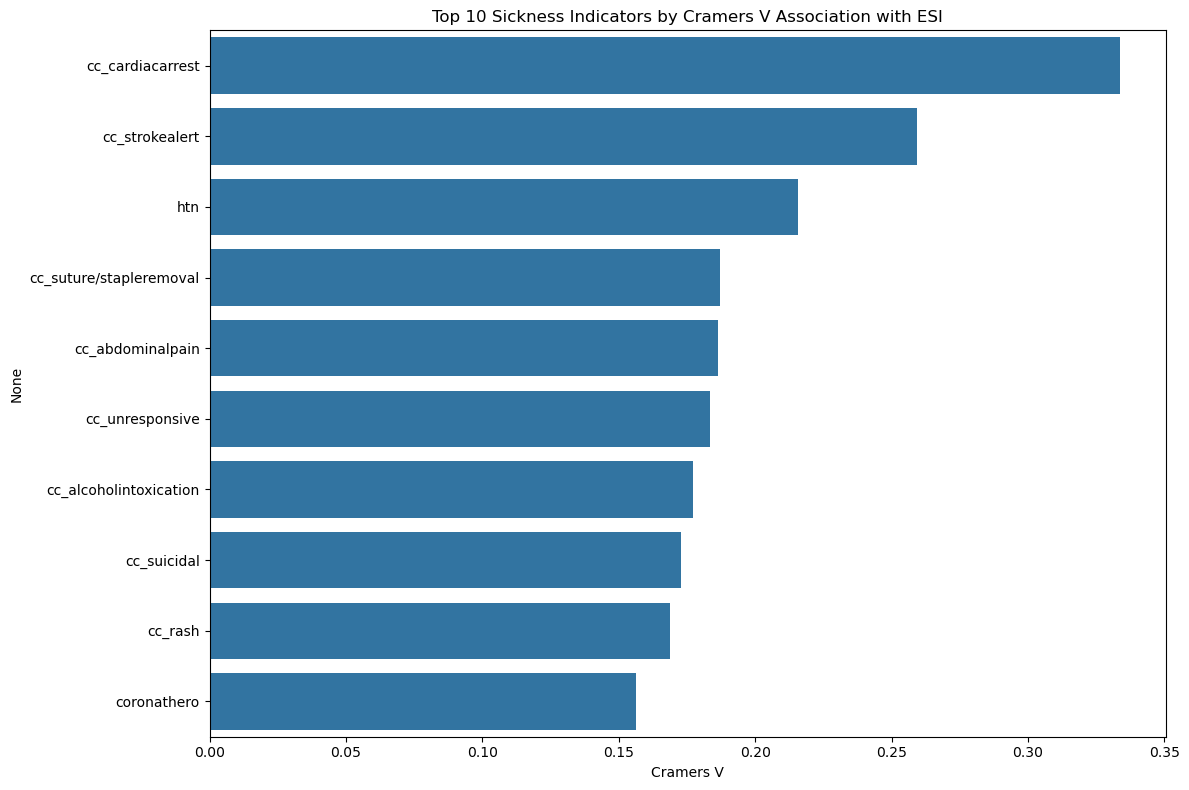

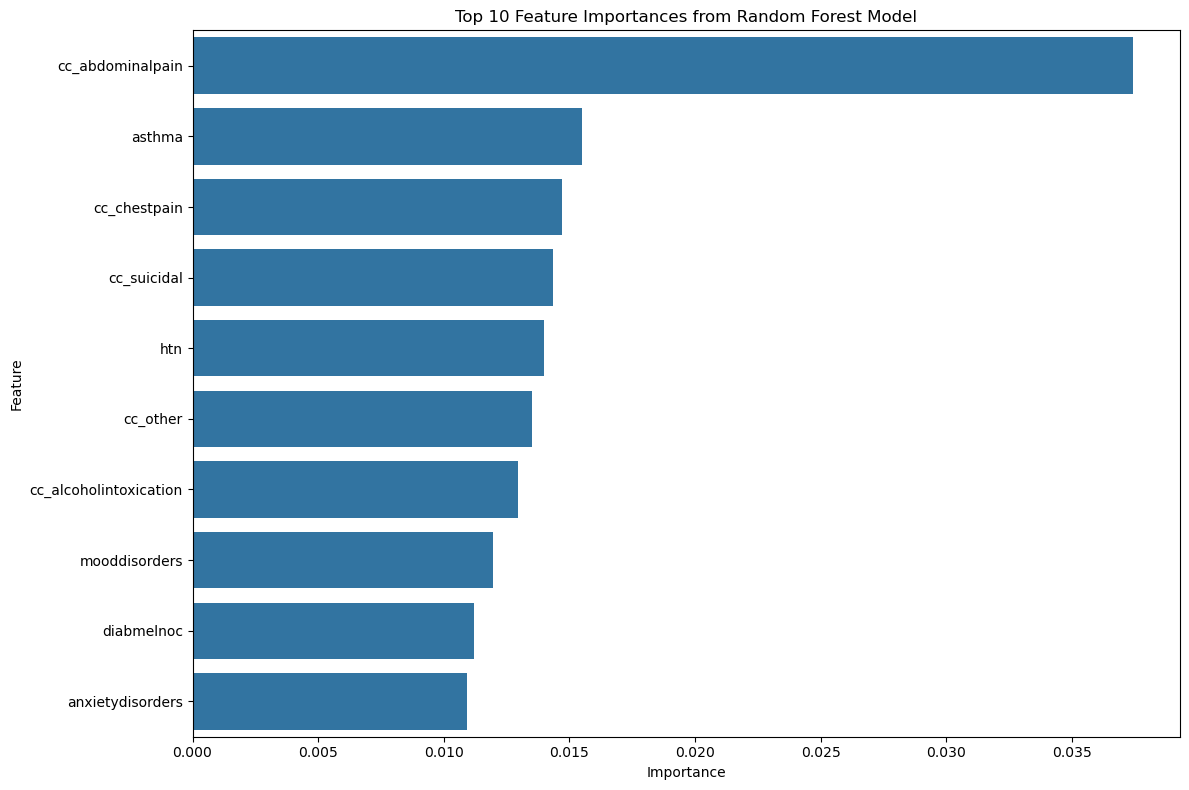

In [26]:
# Plot top 10 Cramer's V associations 
plt.figure(figsize=(12, 8))
sns.barplot(y=associations_df.head(10).index, x=associations_df.head(10)['Cramers_V'])
plt.title('Top 10 Sickness Indicators by Cramers V Association with ESI')
plt.xlabel('Cramers V')
plt.tight_layout()
plt.show()

# Plot top 10 feature  Random Forest
plt.figure(figsize=(12, 8))
sns.barplot(y=feature_importance_df.head(10)['Feature'], x=feature_importance_df.head(10)['Importance'])
plt.title('Top 10 Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# Prepare data

In [28]:
X = df[chief_complaint_cols + previous_sickness_cols]  # Sickness-related columns
y = df['esi'].cat.codes  # Convert 'esi' to numeric codes

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train an XGBoost model

In [30]:
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',  # For multi-class classification
    num_class=len(y.unique()),  # Number of unique classes in 'esi'
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_class=5, ...)

# Evaluate the model

In [32]:
y_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

XGBoost Accuracy: 0.630242825607064
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.18      0.26        89
           1       0.71      0.52      0.60      2897
           2       0.61      0.76      0.68      4331
           3       0.61      0.64      0.63      2203
           4       0.57      0.12      0.20       446

    accuracy                           0.63      9966
   macro avg       0.60      0.44      0.47      9966
weighted avg       0.64      0.63      0.62      9966



In [33]:
# Extract feature importance
feature_importance = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

In [34]:
# Display top features
print("Top sickness-related features influencing ESI based on XGBoost:")
print(feature_importance_df.head(10))

Top sickness-related features influencing ESI based on XGBoost:
                      Feature  Importance
2            cc_abdominalpain    0.027683
8      cc_alcoholintoxication    0.025073
173               cc_suicidal    0.022117
151  cc_psychiatricevaluation    0.021345
82               cc_flankpain    0.020769
31               cc_chestpain    0.015329
21                cc_backpain    0.013802
11     cc_alteredmentalstatus    0.013542
48             cc_drugproblem    0.013386
166         cc_sicklecellpain    0.012740


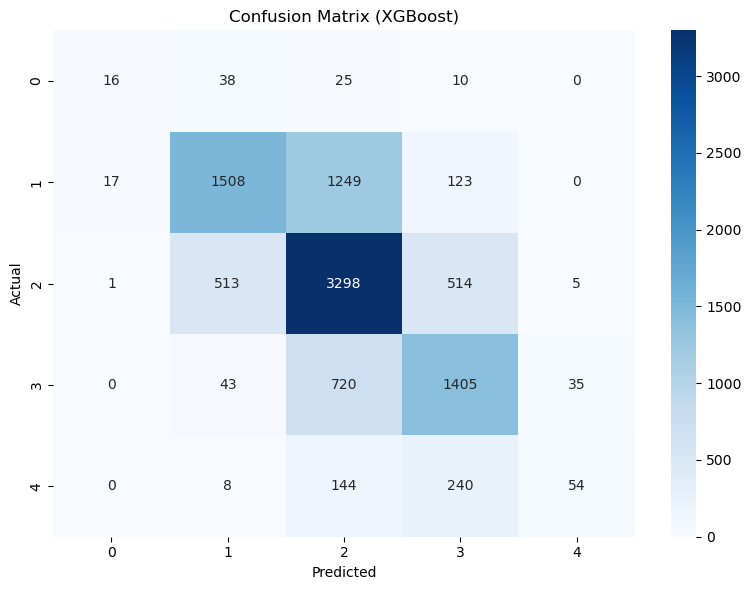


Top 15 most important features (XGBoost):
                      Feature  Importance
2            cc_abdominalpain    0.027683
8      cc_alcoholintoxication    0.025073
173               cc_suicidal    0.022117
151  cc_psychiatricevaluation    0.021345
82               cc_flankpain    0.020769
31               cc_chestpain    0.015329
21                cc_backpain    0.013802
11     cc_alteredmentalstatus    0.013542
48             cc_drugproblem    0.013386
166         cc_sicklecellpain    0.012740
13             cc_ankleinjury    0.012483
132      cc_motorvehiclecrash    0.012409
117             cc_laceration    0.012234
79            cc_fingerinjury    0.011413
165           cc_shoulderpain    0.011362

Average importance of chief complaints: 0.004237976
Average importance of previous sickness: 0.0005443028


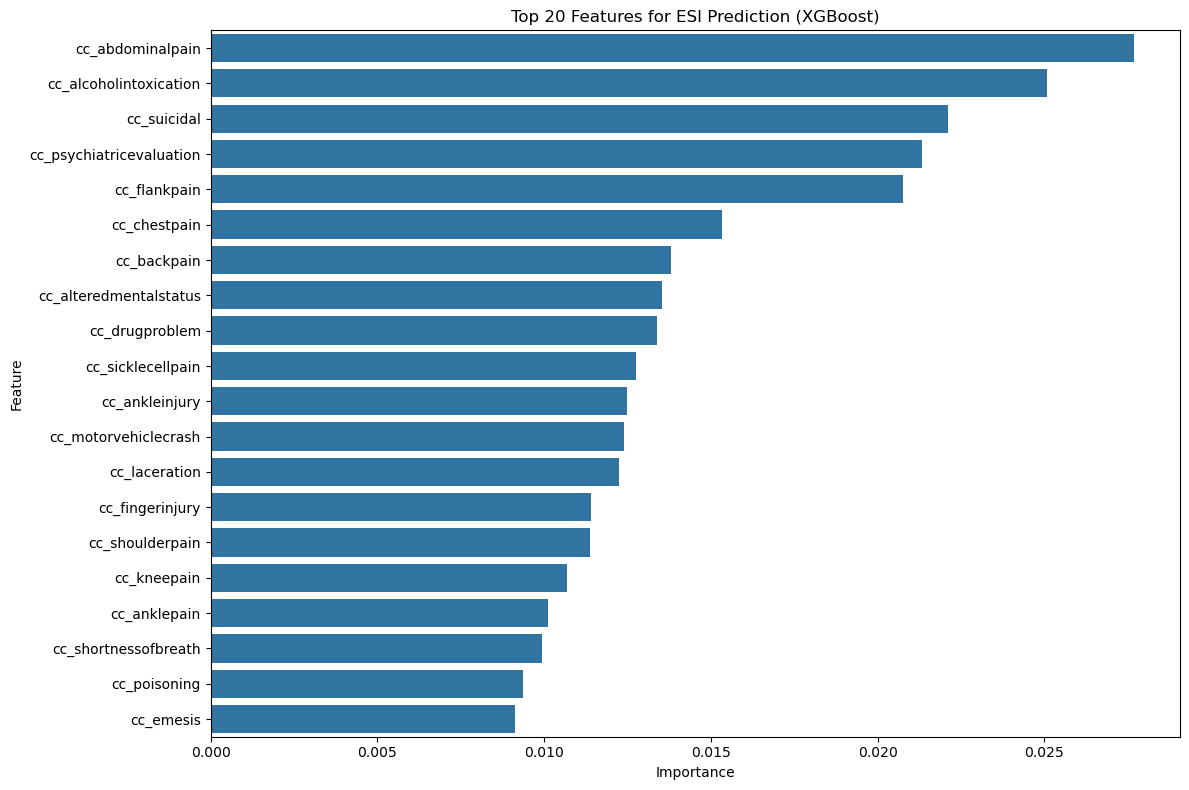

In [35]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost)')
plt.tight_layout()
plt.show()

# Get feature importances
feature_importance = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Print top features
print("\nTop 15 most important features (XGBoost):")
print(feature_importance_df.head(15))

# Compare feature groups
chief_importances = feature_importance_df[feature_importance_df['Feature'].isin(chief_complaint_cols)]
sickness_importances = feature_importance_df[feature_importance_df['Feature'].isin(previous_sickness_cols)]

print("\nAverage importance of chief complaints:", chief_importances['Importance'].mean())
print("Average importance of previous sickness:", sickness_importances['Importance'].mean())

# Visualize feature importances - horizontal bar chart like logistic regression
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Features for ESI Prediction (XGBoost)')
plt.tight_layout()
plt.show()


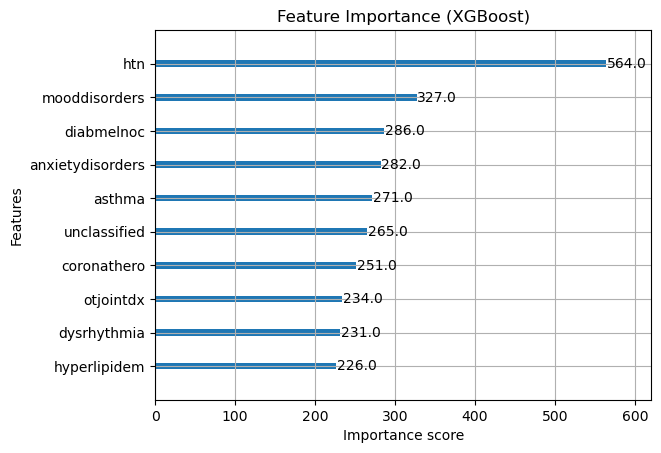

In [36]:
#  Visualize feature importance using XGBoost's built-in plot
plot_importance(xgb_model, max_num_features=10, importance_type='weight', title='Feature Importance (XGBoost)')
plt.show()

# Train Multinomial Logistic Regression model

In [38]:

log_reg = LogisticRegression(multi_class='multinomial', 
                            solver='lbfgs', 
                            max_iter=1000, 
                            C=1.0,
                            random_state=42)
log_reg.fit(X_train_scaled, y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [39]:

# Evaluate model
y_pred = log_reg.predict(X_test_scaled)
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.19      0.26        89
           1       0.69      0.60      0.64      2897
           2       0.64      0.70      0.67      4331
           3       0.62      0.70      0.66      2203
           4       0.51      0.16      0.24       446

    accuracy                           0.64      9966
   macro avg       0.57      0.47      0.50      9966
weighted avg       0.64      0.64      0.64      9966

Accuracy: 0.6439895645193658


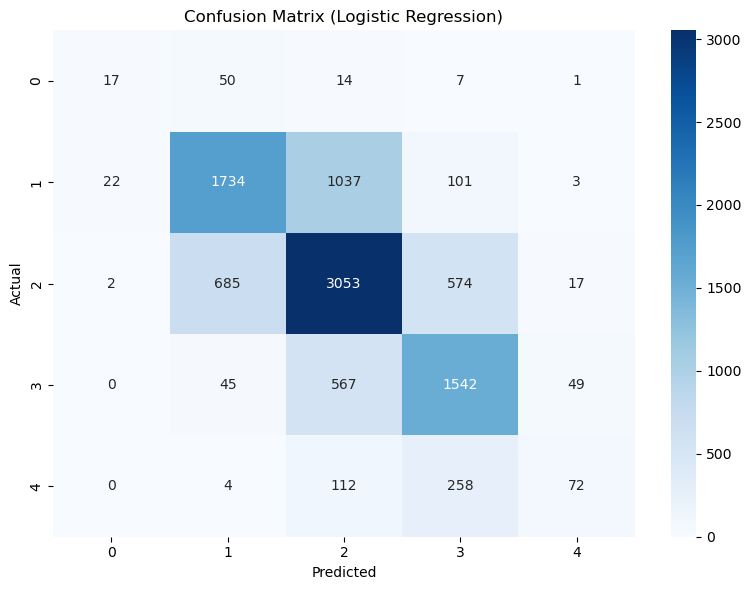


Top 15 most important features (Logistic Regression):
                      Feature  Importance
2            cc_abdominalpain    2.357078
31               cc_chestpain    2.284912
163      cc_shortnessofbreath    2.187385
176                cc_syncope    1.652769
11     cc_alteredmentalstatus    1.642447
172            cc_strokealert    1.448112
173               cc_suicidal    1.427668
192               cc_weakness    1.388821
90              cc_gibleeding    1.323639
161      cc_seizure-priorhxof    1.261748
138      cc_neurologicproblem    1.245328
151  cc_psychiatricevaluation    1.242187
184           cc_unresponsive    1.125928
49                 cc_dyspnea    1.044490
146           cc_palpitations    1.029103

Average importance of chief complaints: 0.5086181444135248
Average importance of previous sickness: 0.19599917680925302


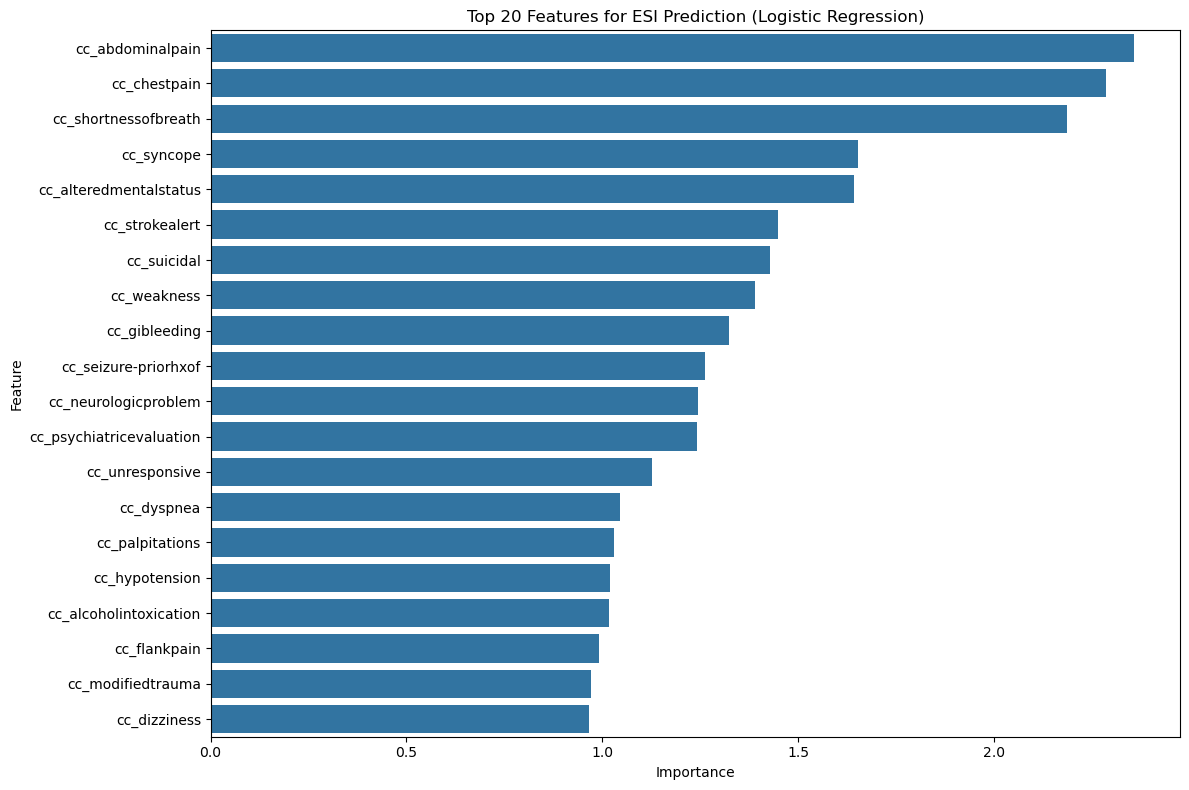

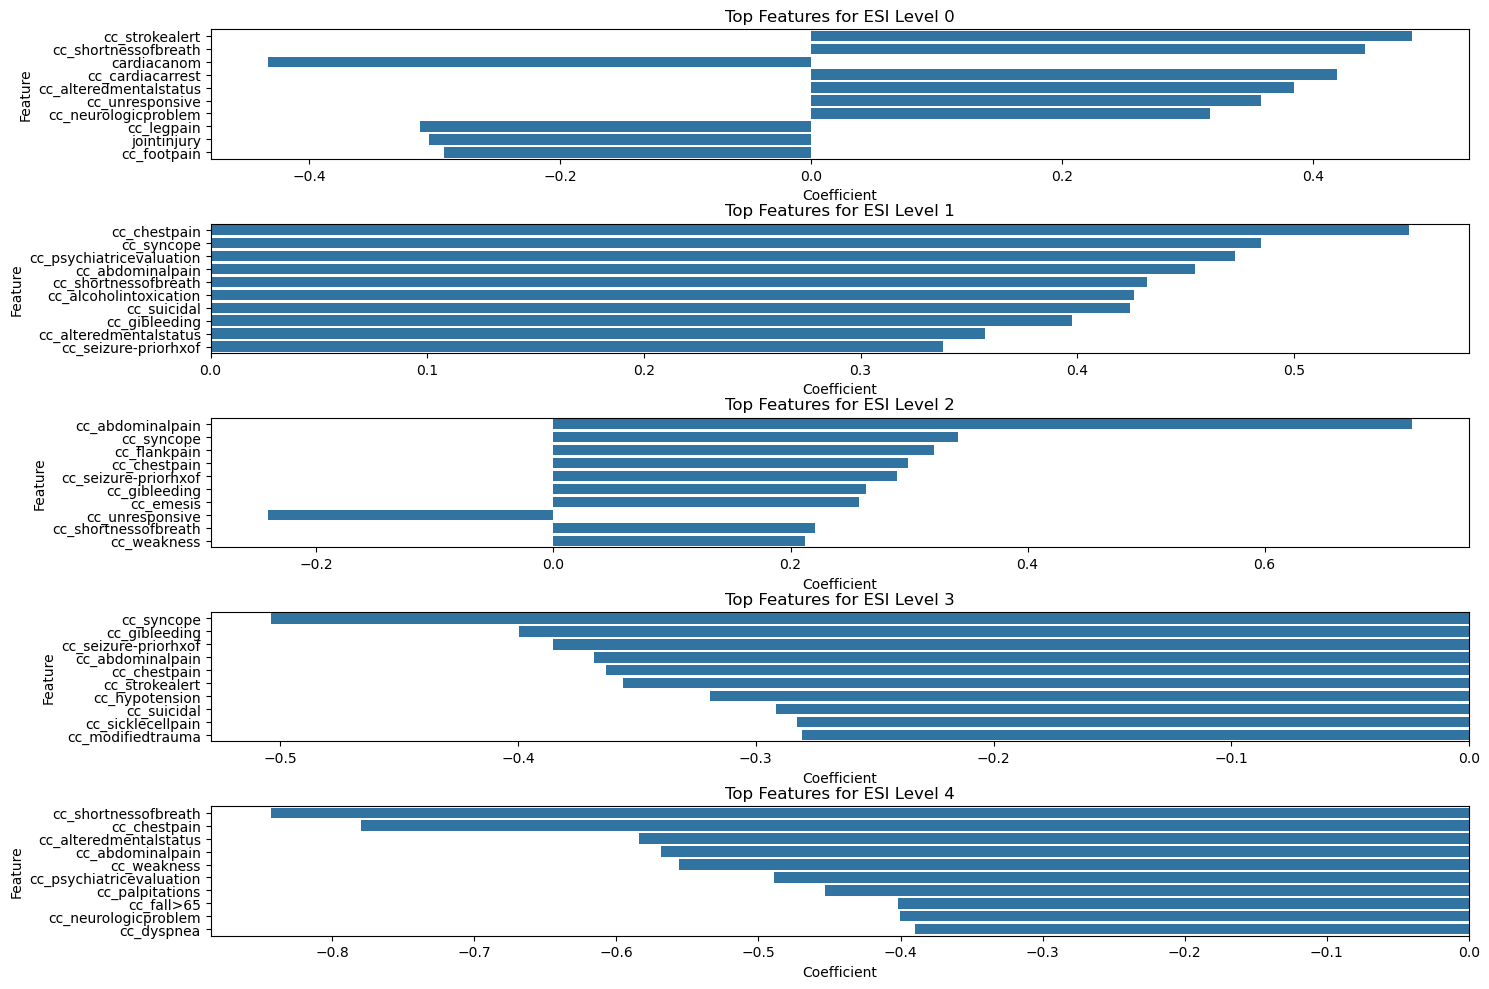

In [40]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.tight_layout()
plt.show()

# Feature importance using coefficients
# For multi-class, we have coefficients for each class
coefs = log_reg.coef_
class_labels = log_reg.classes_

# Get absolute sum of coefficients across all classes for overall importance
feature_importance = np.abs(coefs).sum(axis=0)
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Print top features
print("\nTop 15 most important features (Logistic Regression):")
print(feature_importance_df.head(15))

# Compare feature groups
chief_importances = feature_importance_df[feature_importance_df['Feature'].isin(chief_complaint_cols)]
sickness_importances = feature_importance_df[feature_importance_df['Feature'].isin(previous_sickness_cols)]

print("\nAverage importance of chief complaints:", chief_importances['Importance'].mean())
print("Average importance of previous sickness:", sickness_importances['Importance'].mean())

# Visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Features for ESI Prediction (Logistic Regression)')
plt.tight_layout()
plt.show()

# For a more detailed view, you can also plot coefficients for each class
plt.figure(figsize=(15, 10))
for i, class_label in enumerate(class_labels):
    plt.subplot(len(class_labels), 1, i+1)
    top_features = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': coefs[i]
    }).sort_values(by='Coefficient', key=abs, ascending=False).head(10)
    
    sns.barplot(x='Coefficient', y='Feature', data=top_features)
    plt.title(f'Top Features for ESI Level {class_label}')
    plt.tight_layout()

plt.subplots_adjust(hspace=0.5)
plt.show()